<a href="https://colab.research.google.com/github/Sheega-ameenah/Amina_Shiga/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating Neural network for Regression problem**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full ,y_test = train_test_split(housing.data, housing.target,random_state=42)
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_valid= scaler.transform(X_valid)
X_test= scaler.transform(X_test)


In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model= keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='mean_squared_error',
              optimizer= keras.optimizers.SGD(learning_rate=1e-3),
              metrics= ['mae'])

In [25]:
model_history= model.fit(X_test,y_test, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
162/162 [==============================] - 0s 3ms/step - loss: 0.4052 - mae: 0.4576 - val_loss: 0.3998 - val_mae: 0.4545
Epoch 2/20
162/162 [==============================] - 0s 3ms/step - loss: 0.4034 - mae: 0.4569 - val_loss: 0.3990 - val_mae: 0.4524
Epoch 3/20
162/162 [==============================] - 0s 3ms/step - loss: 0.4017 - mae: 0.4547 - val_loss: 0.4001 - val_mae: 0.4523
Epoch 4/20
162/162 [==============================] - 1s 4ms/step - loss: 0.4001 - mae: 0.4546 - val_loss: 0.4004 - val_mae: 0.4503
Epoch 5/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3984 - mae: 0.4533 - val_loss: 0.4019 - val_mae: 0.4500
Epoch 6/20
162/162 [==============================] - 1s 4ms/step - loss: 0.3970 - mae: 0.4520 - val_loss: 0.4032 - val_mae: 0.4491
Epoch 7/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3955 - mae: 0.4509 - val_loss: 0.4056 - val_mae: 0.4491
Epoch 8/20
162/162 [==============================] - 1s 4ms/step - loss: 0.

In [26]:
model_history.history

{'loss': [0.405240923166275,
  0.4033694267272949,
  0.4016967713832855,
  0.40008261799812317,
  0.39836034178733826,
  0.3969574570655823,
  0.39545291662216187,
  0.3939833343029022,
  0.39252713322639465,
  0.39128610491752625,
  0.3898508846759796,
  0.3885238468647003,
  0.38736841082572937,
  0.3863043487071991,
  0.38497471809387207,
  0.3838389217853546,
  0.38290128111839294,
  0.3818120062351227,
  0.38078969717025757,
  0.37959611415863037],
 'mae': [0.45763668417930603,
  0.4568539261817932,
  0.4547256827354431,
  0.45464715361595154,
  0.4533452093601227,
  0.45196104049682617,
  0.4508982002735138,
  0.4507407546043396,
  0.4485902190208435,
  0.4490813910961151,
  0.44760051369667053,
  0.44571182131767273,
  0.44654834270477295,
  0.4455200731754303,
  0.4439690113067627,
  0.4438043534755707,
  0.4423203468322754,
  0.44175130128860474,
  0.44192391633987427,
  0.44071096181869507],
 'val_loss': [0.39976003766059875,
  0.39902588725090027,
  0.40011897683143616,
  0.

In [27]:
mae_test= model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3785 - mae: 0.4411


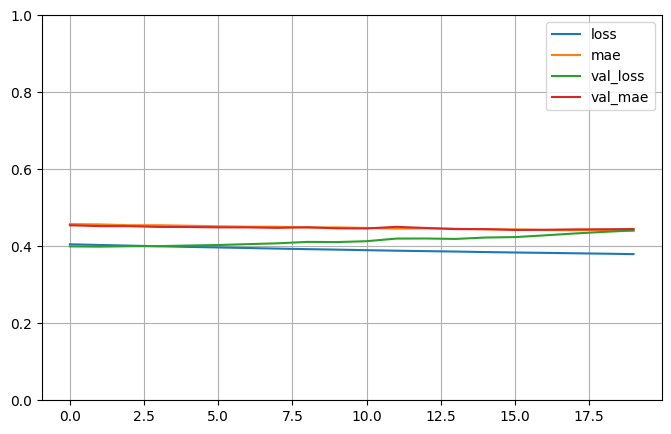

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
X_new= X_test[:3]

In [30]:
y_pred= model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 23ms/step
[[0.7062007]
 [1.7411419]
 [3.4106593]]
[0.477   0.458   5.00001]
